In [ ]:
#Importing basic packages

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns


Mounted at /content/drive


In [ ]:
file_url = "https://raw.githubusercontent.com/joopark01/projects/main/European_Ski_Resorts.csv"
pd.read_csv(file_url)
df.head()

,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
1,2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
2,3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
3,4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
4,5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


## Data Cleaning

In [ ]:
df = df.drop(["Country","Unnamed: 0"],axis = 1)
no_report_rows = df[df.eq('no report').any(1)]
df = df.drop(no_report_rows.index)
df = df.replace({'Yes': 1 , 'No': 0})
df = df.drop('Resort',axis=1)
df.head()

<ipython-input-3-056f7566cf1e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  no_report_rows = df[df.eq('no report').any(1)]


,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1980,740,52,30,81,4,115,1,0,22,16,11,49,75398,600
1,2640,1710,47,100,77,33,210,1,1,37,28,7,72,99017,1032
2,1130,900,30,1,0,1,2,0,0,2,0,0,2,1932,0
3,1620,780,42,15,33,3,51,1,1,25,8,3,36,32938,163
4,2320,940,22,30,26,21,77,1,0,6,11,10,27,49228,450


In [ ]:
#check if there's any null value
df.isnull().values.any()

False

## Data Visualization

In [ ]:
df[['DayPassPriceAdult','HighestPoint','TotalSlope','TotalLifts']].describe().round(2)


,DayPassPriceAdult,HighestPoint,TotalSlope,TotalLifts
count,368.00,368.00,368.00,368.00
mean,41.43,2094.85,88.12,27.54
std,11.65,727.05,114.26,31.12
min,0.00,122.00,0.00,1.00
25%,34.00,1600.00,25.00,10.00
50%,42.50,2119.00,50.00,17.00
75%,49.00,2596.25,100.00,30.00
max,81.00,3899.00,600.00,174.00


In [ ]:
df.corr()["DayPassPriceAdult"]

HighestPoint         0.465814
LowestPoint          0.086593
DayPassPriceAdult    1.000000
BeginnerSlope        0.420172
IntermediateSlope    0.543470
DifficultSlope       0.485106
TotalSlope           0.511557
Snowparks            0.327190
NightSki             0.089845
SurfaceLifts         0.359909
ChairLifts           0.428112
GondolaLifts         0.538248
TotalLifts           0.455620
LiftCapacity         0.461365
SnowCannons          0.394198
Name: DayPassPriceAdult, dtype: float64

<Axes: >

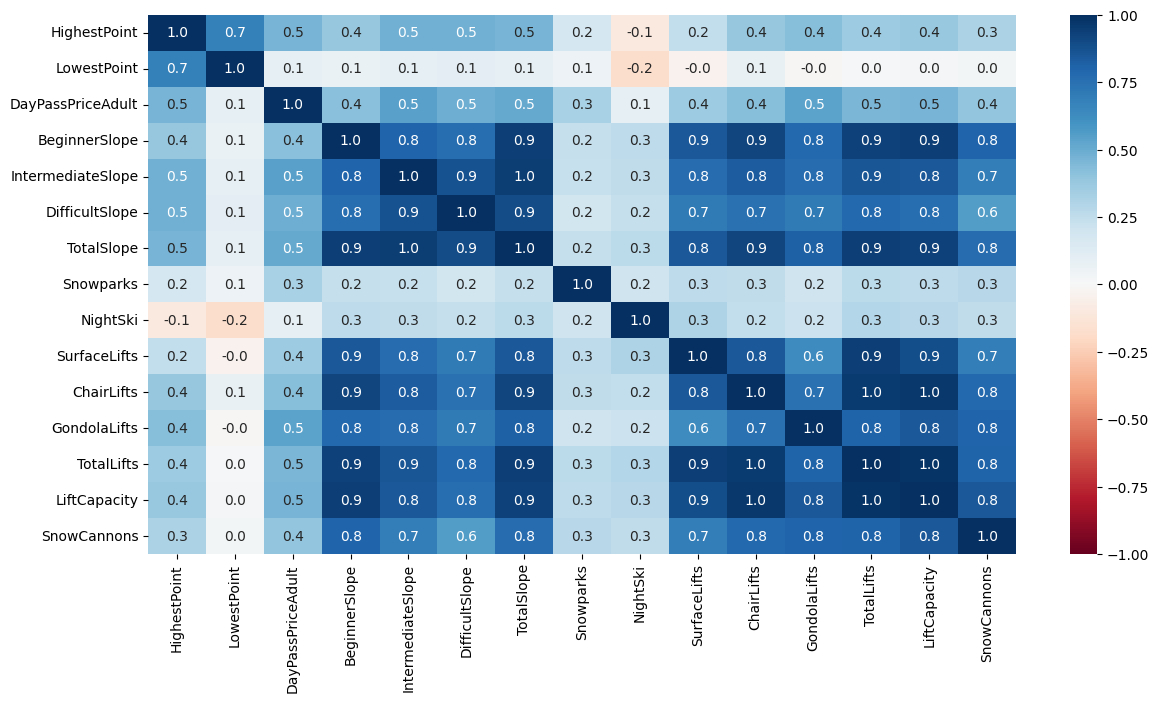

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, fmt=".1f",vmin=-1,vmax=1,cmap="RdBu")

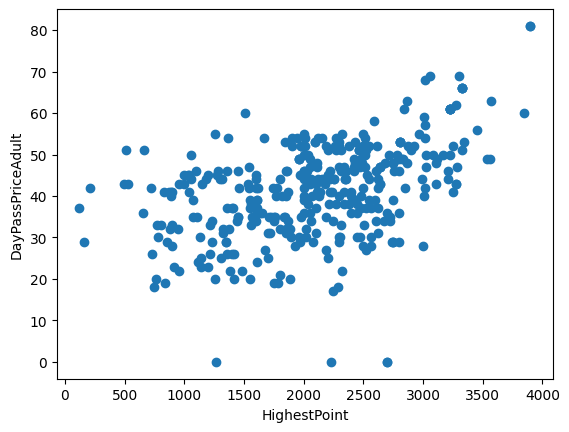

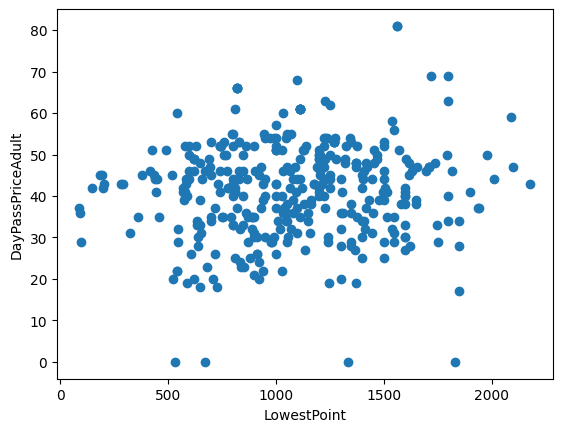

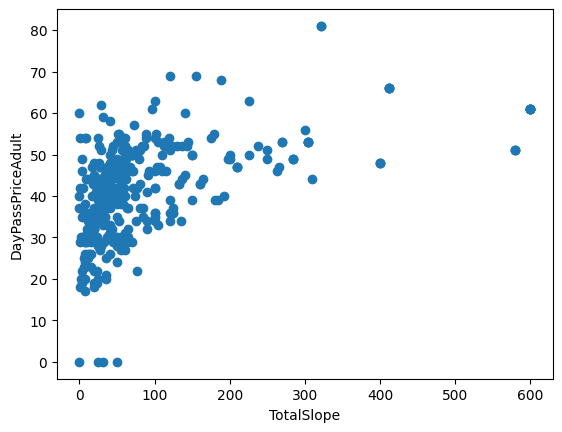

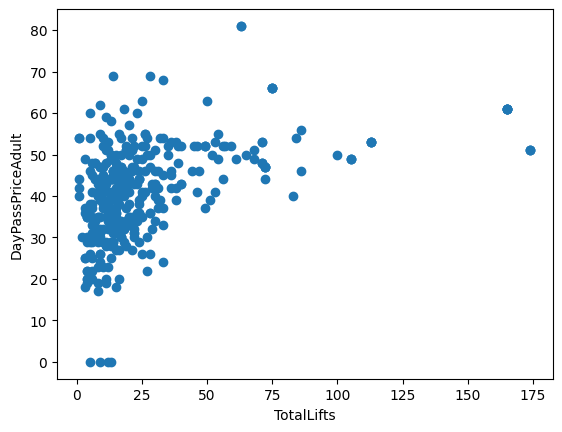

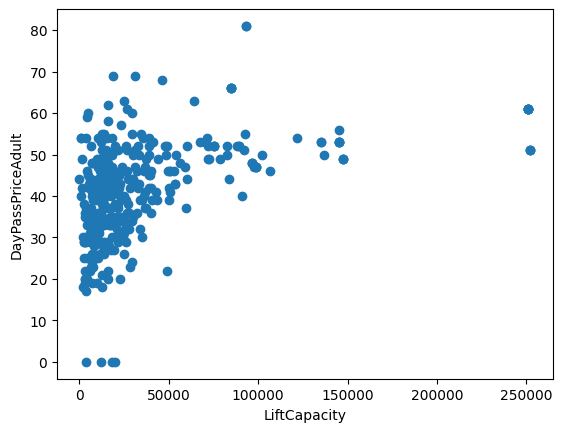

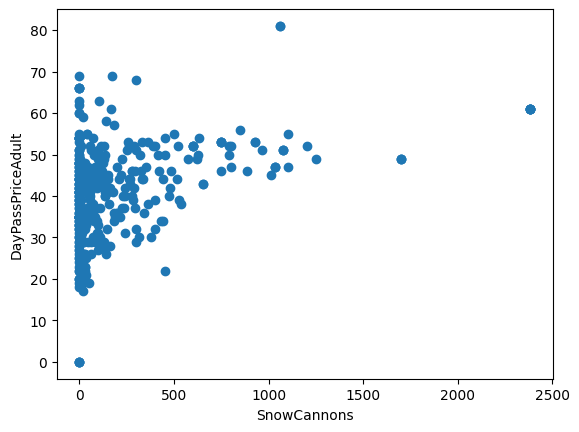

In [ ]:
predictors = ['HighestPoint','LowestPoint','TotalSlope','TotalLifts','LiftCapacity','SnowCannons']
for predictor in predictors:
  plt.scatter(df[predictor], df['DayPassPriceAdult'])
  plt.xlabel(predictor)
  plt.ylabel('DayPassPriceAdult')
  plt.show()

Text(0, 0.5, 'Day Pass Price')

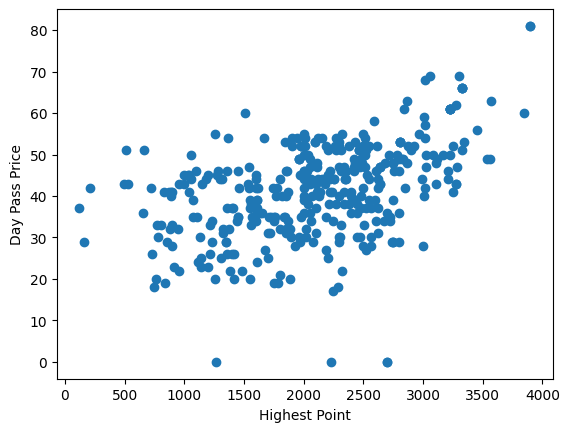

In [ ]:
plt.scatter(df['HighestPoint'],df['DayPassPriceAdult'])
plt.xlabel('Highest Point')
plt.ylabel('Day Pass Price')

Text(0, 0.5, 'Day Pass Price')

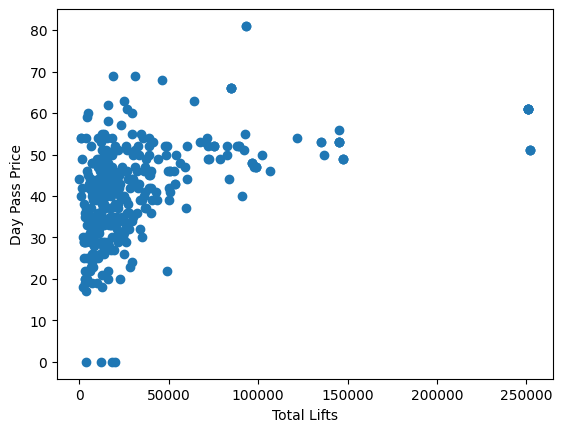

In [ ]:
plt.scatter(df['LiftCapacity'],df['DayPassPriceAdult'])
plt.xlabel('Total Lifts')
plt.ylabel('Day Pass Price')

,DayPassPriceAdult
Snowparks,
0,34.744444
1,43.597122


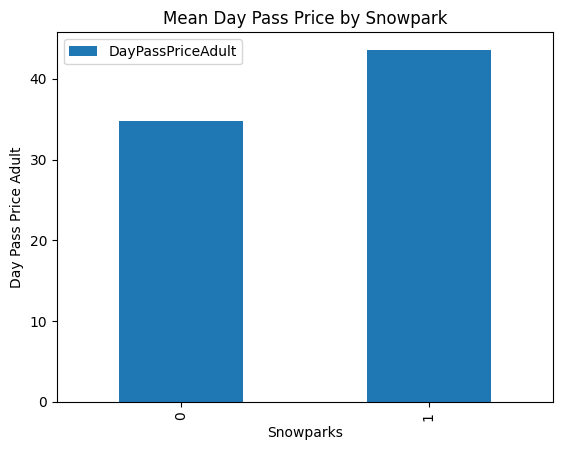

In [ ]:
df2 = df[['Snowparks','DayPassPriceAdult']].groupby('Snowparks').mean()
ax = df2.plot.bar()
ax.set_xlabel('Snowparks')
ax.set_ylabel('Day Pass Price Adult')
ax.set_title('Mean Day Pass Price by Snowpark')
df2

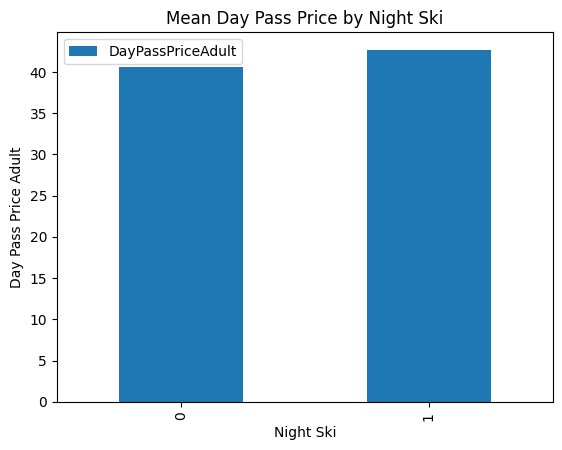

In [ ]:
df3 = df[['NightSki','DayPassPriceAdult']].groupby('NightSki').mean()
ax = df3.plot.bar()
ax.set_xlabel('Night Ski')
ax.set_ylabel('Day Pass Price Adult')
ax.set_title('Mean Day Pass Price by Night Ski')
for i, v in enumerate(df['DayPassPriceAdult']):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

In [ ]:
expensive_tickets = df[df['DayPassPriceAdult'] > df['DayPassPriceAdult'].median() ]
cheap_tickets = df[df['DayPassPriceAdult'] <= df['DayPassPriceAdult'].median() ]

Text(0.5, 1.0, 'Difference in number of slopes between tickets prices')

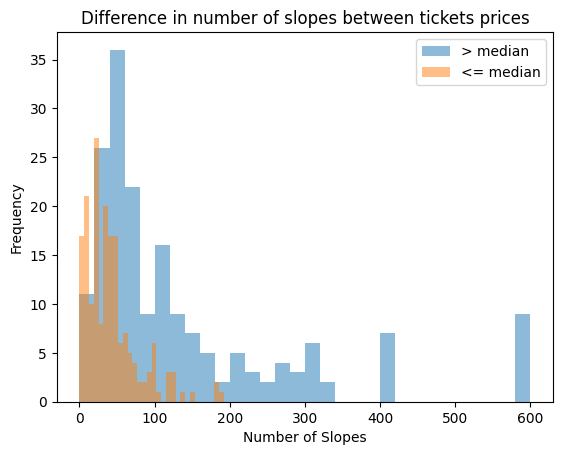

In [ ]:
plt.hist(expensive_tickets['TotalSlope'], bins=30, alpha=0.5, label='> median')
plt.hist(cheap_tickets['TotalSlope'], bins=30, alpha=0.5, label='<= median')
plt.legend(loc='upper right')

plt.xlabel('Number of Slopes')
plt.ylabel('Frequency')
plt.title('Difference in number of slopes between tickets prices')


Text(0.5, 1.0, 'Difference in number of lifts between tickets prices')

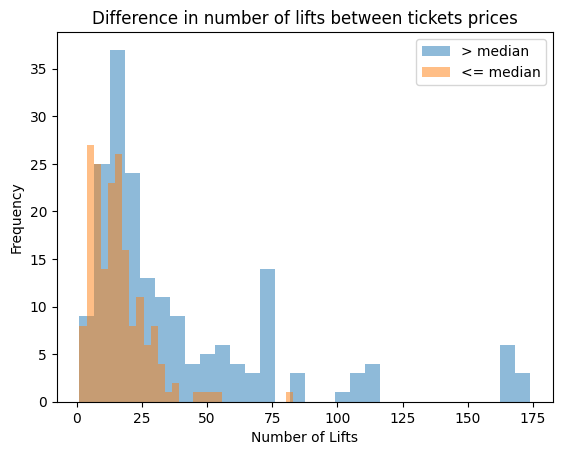

In [ ]:
plt.hist(expensive_tickets['TotalLifts'], bins=30, alpha=0.5, label='> median')
plt.hist(cheap_tickets['TotalLifts'], bins=30, alpha=0.5, label='<= median')
plt.legend(loc='upper right')

plt.xlabel('Number of Lifts')
plt.ylabel('Frequency')
plt.title('Difference in number of lifts between tickets prices')

## Train Test Split

In [ ]:
df["Total Length"] = df["HighestPoint"] - df["LowestPoint"]
df.head()

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons,Total Length
0,1980,740,52,30,81,4,115,1,0,22,16,11,49,75398,600,1240
1,2640,1710,47,100,77,33,210,1,1,37,28,7,72,99017,1032,930
2,1130,900,30,1,0,1,2,0,0,2,0,0,2,1932,0,230
3,1620,780,42,15,33,3,51,1,1,25,8,3,36,32938,163,840
4,2320,940,22,30,26,21,77,1,0,6,11,10,27,49228,450,1380


In [ ]:
outcome = df['DayPassPriceAdult']
predictors = df.drop(['DayPassPriceAdult','LowestPoint','HighestPoint'], axis = 1)
#standardize predictors

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 13), (74, 13), (294,), (74,))

## Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#use standard scaler to standarsize the model
outcome = df['DayPassPriceAdult']
predictors = df.drop(['DayPassPriceAdult','HighestPoint','LowestPoint'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression 
linear_model = LinearRegression(fit_intercept=True)      
linear_model.fit(X_train, y_train)
                  
predictor_names = predictors.columns.tolist()
coefficients_dict = dict(zip(predictor_names, linear_model.coef_.round(4)))
for predictor, coefficient in coefficients_dict.items():
    print(f'{predictor}: {coefficient}')

BeginnerSlope: 4.1812
IntermediateSlope: 9.2615
DifficultSlope: 0.3656
TotalSlope: -10.5026
Snowparks: 3.0521
NightSki: -0.3121
SurfaceLifts: -0.5335
ChairLifts: 0.2094
GondolaLifts: 4.1882
TotalLifts: 0.7269
LiftCapacity: -1.382
SnowCannons: -1.6528
Total Length: 2.873


In [ ]:
linear_model.intercept_

41.316326530612244

In [ ]:
#use cross-validation to compute the rmse
from sklearn.model_selection import cross_val_score
cv_scores10 = cross_val_score(linear_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
mse_cv10 = -np.mean(cv_scores10)
print('Minimum MSE from cross-validation when k=10:', mse_cv10)
cv_scores5 = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv5 = -np.mean(cv_scores5)
print('Minimum MSE from cross-validation when k=5:', mse_cv5)
print(np.sqrt(mse_cv5),np.sqrt(mse_cv10))

Minimum MSE from cross-validation when k=10: 83.9788135032517
Minimum MSE from cross-validation when k=5: 84.86737149620284
9.212348858798327 9.16399549886684


In [ ]:
#RMSE for the training data
y_train_fit = linear_model.predict(X_train)              

mse_train = np.mean( (y_train - y_train_fit)**2 )
print(np.sqrt(mse_train), mse_train)

8.712641739519013 75.91012608120889


In [ ]:
#RMSE for the testing data
y_test_fit = linear_model.predict(X_test)                
mse_test = np.mean( (y_test - y_test_fit)**2 )
print(np.sqrt(mse_test), mse_test)

8.545322191158004 73.02253135069742


## Ridge Regression

In [ ]:
#select the best ridge model by cross-validaiton by implementing lasso_cv
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

ridge_model = RidgeCV(cv=5).fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
print("RSME of y_train when k=5:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
y_test_pred = ridge_model.predict(X_test)
print("RSME of y_test when k=5:", np.sqrt(mean_squared_error(y_test,y_test_pred)))

RSME of y_train when k=5: 8.725619208690567
RSME of y_test when k=5: 8.43894148507189


In [ ]:
ridge_model.alpha_

10.0

In [ ]:
#Also test when k = 10
ridge_model2 = RidgeCV(cv=10).fit(X_train, y_train)
y2_train_pred = ridge_model2.predict(X_train)
print("RSME of y_train when k=10:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
y2_test_pred = ridge_model2.predict(X_test)
print("RSME of y_test when k=10:", np.sqrt(mean_squared_error(y_test,y_test_pred)))

RSME of y_train when k=10: 8.725619208690567
RSME of y_test when k=10: 8.43894148507189


In [ ]:
#Since there's no such difference, we proceed with k = 5 since it's less time-consuming
ridge_model.intercept_

41.316326530612244

In [ ]:
coefficients_dict = dict(zip(predictor_names, ridge_model.coef_.round(4)))
for predictor, coefficient in coefficients_dict.items():
    print(f'{predictor}: {coefficient}')

BeginnerSlope: -1.2634
IntermediateSlope: 3.5733
DifficultSlope: -0.6875
TotalSlope: 0.8528
Snowparks: 2.9126
NightSki: -0.3197
SurfaceLifts: -0.6445
ChairLifts: -0.2494
GondolaLifts: 3.3987
TotalLifts: 0.3184
LiftCapacity: -0.0718
SnowCannons: -1.159
Total Length: 2.9019


## Lasso Regression

In [ ]:
#select the best lasso model by cross-validaiton by implementing lasso_cv
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=5).fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
print("RSME of y_train when k=5:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
y_test_pred = lasso_model.predict(X_test)
print("RSME of y_test when k=5:", np.sqrt(mean_squared_error(y_test,y_test_pred)))

RSME of y_train when k=5: 8.743653126679524
RSME of y_test when k=5: 8.396352103501963


In [ ]:
#Also test when k =10
from sklearn.linear_model import LassoCV
lasso_model2 = LassoCV(cv=10).fit(X_train, y_train)

y_train_pred2 = lasso_model.predict(X_train)
print("RSME of y_train when k=10:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
y_test_pred2 = lasso_model.predict(X_test)
print("RSME of y_test when k=10:", np.sqrt(mean_squared_error(y_test,y_test_pred)))

RSME of y_train when k=10: 8.743653126679524
RSME of y_test when k=10: 8.396352103501963


In [ ]:
#Since there's no such difference, we proceed with k = 5 since it's less time-consuming
lasso_model.intercept_

41.316326530612244

In [ ]:
lasso_model.alpha_

0.11885990570140371

In [ ]:
coefficients_dict = dict(zip(predictor_names, lasso_model.coef_.round(4)))
for predictor, coefficient in coefficients_dict.items():
    print(f'{predictor}: {coefficient}')

BeginnerSlope: -1.0597
IntermediateSlope: 3.4539
DifficultSlope: -0.1111
TotalSlope: -0.0
Snowparks: 2.8405
NightSki: -0.2309
SurfaceLifts: -0.4011
ChairLifts: -0.0
GondolaLifts: 3.2003
TotalLifts: -0.0
LiftCapacity: -0.0
SnowCannons: -0.8424
Total Length: 2.9174


## Full Decision Tree(Regression)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
X = df[['Total Length', 'HighestPoint', 'BeginnerSlope', 'IntermediateSlope', 'DifficultSlope', 'TotalSlope', 'SurfaceLifts', 'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity', 'SnowCannons', 
        'Total Length', 'Snowparks']]
y = df['DayPassPriceAdult']

# Define the number of folds for cross-validation
n_folds = 10

# Initialize the mean squared error list
mse_list = []

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# Loop over each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the decision tree regressor and fit it on the training data for this fold
    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train, y_train)

    # Predict the output for the testing data for this fold
    y_pred = regressor.predict(X_test)

    # Calculate the mean squared error for this fold and append it to the list
    mse_list.append(mean_squared_error(y_test, y_pred))

# Calculate the mean and standard deviation of the mean squared error across all the folds
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)

print("Mean squared error:", mse_mean)

# Fit the decision tree regressor on the entire dataset
regressor.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

Mean squared error: 126.79894894894896


In [ ]:
print('Number of classes: ', regressor.tree_.n_classes)
print('Number of features: ', regressor.tree_.n_features)
print('Number of nodes: ', regressor.tree_.node_count)
print('Number of leaves: ', regressor.tree_.n_leaves)
print('Number of maximum depth: ', regressor.tree_.max_depth)

## Decision Tree(Pruned Tree)

In [ ]:
#pruned tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:
X = df[['Total Length', 'HighestPoint', 'BeginnerSlope', 'IntermediateSlope', 'DifficultSlope', 'TotalSlope', 'SurfaceLifts', 'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity', 'SnowCannons', 'Total Length', 'Snowparks']]
y = df['DayPassPriceAdult']


n_folds = 10


param_grid = {'max_depth': [3, 5, 7, 9, 11]}


regressor = DecisionTreeRegressor(random_state=1)


kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)


rmse_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    grid_search = GridSearchCV(regressor, param_grid, cv=kf, scoring='neg_mean_squared_error')
    
    
    grid_search.fit(X_train, y_train)
    
    
    best_params = grid_search.best_params_
    
    
    regressor_cv = DecisionTreeRegressor(random_state=1, **best_params)
    regressor_cv.fit(X_train, y_train)
    
    
    y_pred = regressor_cv.predict(X_test)
    
    
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))


rmse_mean = np.mean(rmse_list)
rmse_std = np.std(rmse_list)

print("RMSE:", rmse_mean)



regressor_final = DecisionTreeRegressor(random_state=1, **best_params)
regressor_final.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(regressor_final, filled=True, feature_names=X.columns)
plt.show()


In [ ]:
print('Number of classes: ', regressor_final.tree_.n_classes)
print('Number of features: ', regressor_final.tree_.n_features)
print('Number of nodes: ', regressor_final.tree_.node_count)
print('Number of leaves: ', regressor_final.tree_.n_leaves)
print('Number of maximum depth: ', regressor_final.tree_.max_depth)

## Random Forest(Regression)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np


param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15]}


rf_regressor = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42),
                           scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


rf_regressor = RandomForestRegressor(**best_params, random_state=42)


rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(mse)


print("RMSE:", rmse)


RMSE: 9.309486674794346


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Finding RMSE from Decision Tree Model
tree_model = DecisionTreeRegressor(random_state = 0)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  10.518502216993106


In [ ]:
#Fitting model to Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#Finding RMSE of Random Forest Model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  9.501303857892347


In [ ]:
from sklearn.model_selection import GridSearchCV

#Using GridSearchCV to find the best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.2909493433649567


RandomForestRegressor(min_samples_split=5, n_estimators=50, random_state=0)

In [ ]:
#Finding RMSE from the best Random Forest
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 9.27946896515113


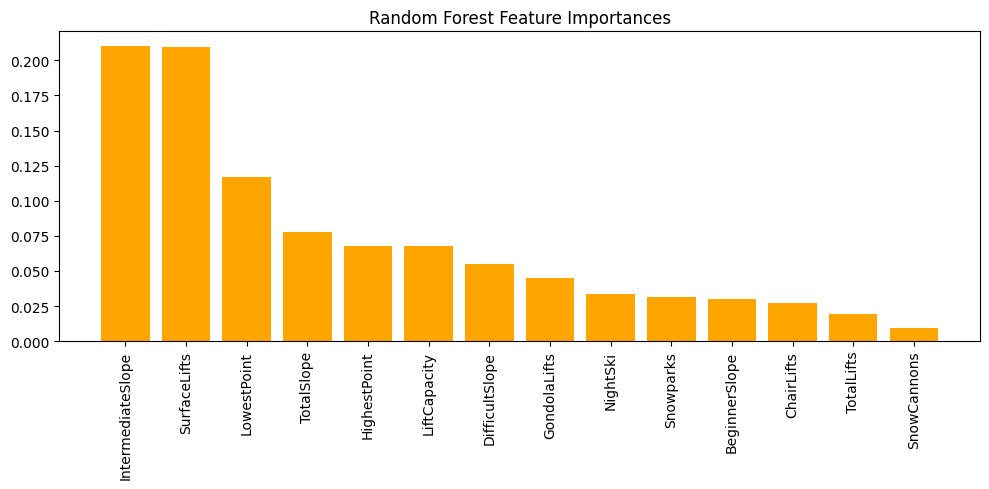

In [ ]:
#Feature Importances Visualization

featureNames = df.drop('DayPassPriceAdult', axis = 1)
feature_names = list(featureNames.columns)

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(indices)), importances[indices], color='#ffa500', align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation='vertical')
plt.tight_layout()
plt.show()

## Boosting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
import math as m
from sklearn.metrics import mean_squared_error

num_trees = 100
decision_stump = DecisionTreeRegressor(max_depth=5)
adaboost = AdaBoostRegressor(DecisionTreeRegressor())

# define the parameter distributions
param_dist = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300],
    'learning_rate': uniform(0.001, .1),
    'base_estimator__max_depth': [2, 3, 4, 5, 6, 7, 8, 9]
}

# create the randomized search object
random_search = RandomizedSearchCV(adaboost, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_root_mean_squared_error')

# fit the randomized search object to the training data
random_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding mean squared error
print("Best Hyperparameters:", random_search.best_params_)
#print("Mean Squared Error:", -random_search.best_score_)

y_pred = random_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", m.sqrt(mse))
